L'obiettivo di questo studio è individuare un modello predittivo che identifichi il produttore dei vini nel database Wine di scikit-learn. In questo database il produttore è già catalogato sotto la colonna "target".

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import itertools

1. SETUP INIZIALE e CARICAMENTO DATI

In [51]:
# caricamento dataset vino
wine = datasets.load_wine()

# creazione di un DataFrame dai dati e dal target
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

display(df.head())

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

2. ANALISI ESPLORATIVA dei DATI (EDA)

In [52]:
# Visualizza info dataset
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [53]:
# Visualizza informazioni generali sul DataFrame
print("\nInformazioni sul DataFrame:")
display(df.info())

# Visualizza le statistiche descrittive del DataFrame
print("\nStatistiche descrittive:")
display(df.describe())

# Visualizza il numero di valori mancanti per colonna
print("\nValori mancanti per colonna:")
display(df.isnull().sum())


Informazioni sul DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 n

None


Statistiche descrittive:


alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

           target  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000


Valori mancanti per colonna:


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

2.1. Grafici di distribuzione univariata: ISTOGRAMMI e BOX PLOT

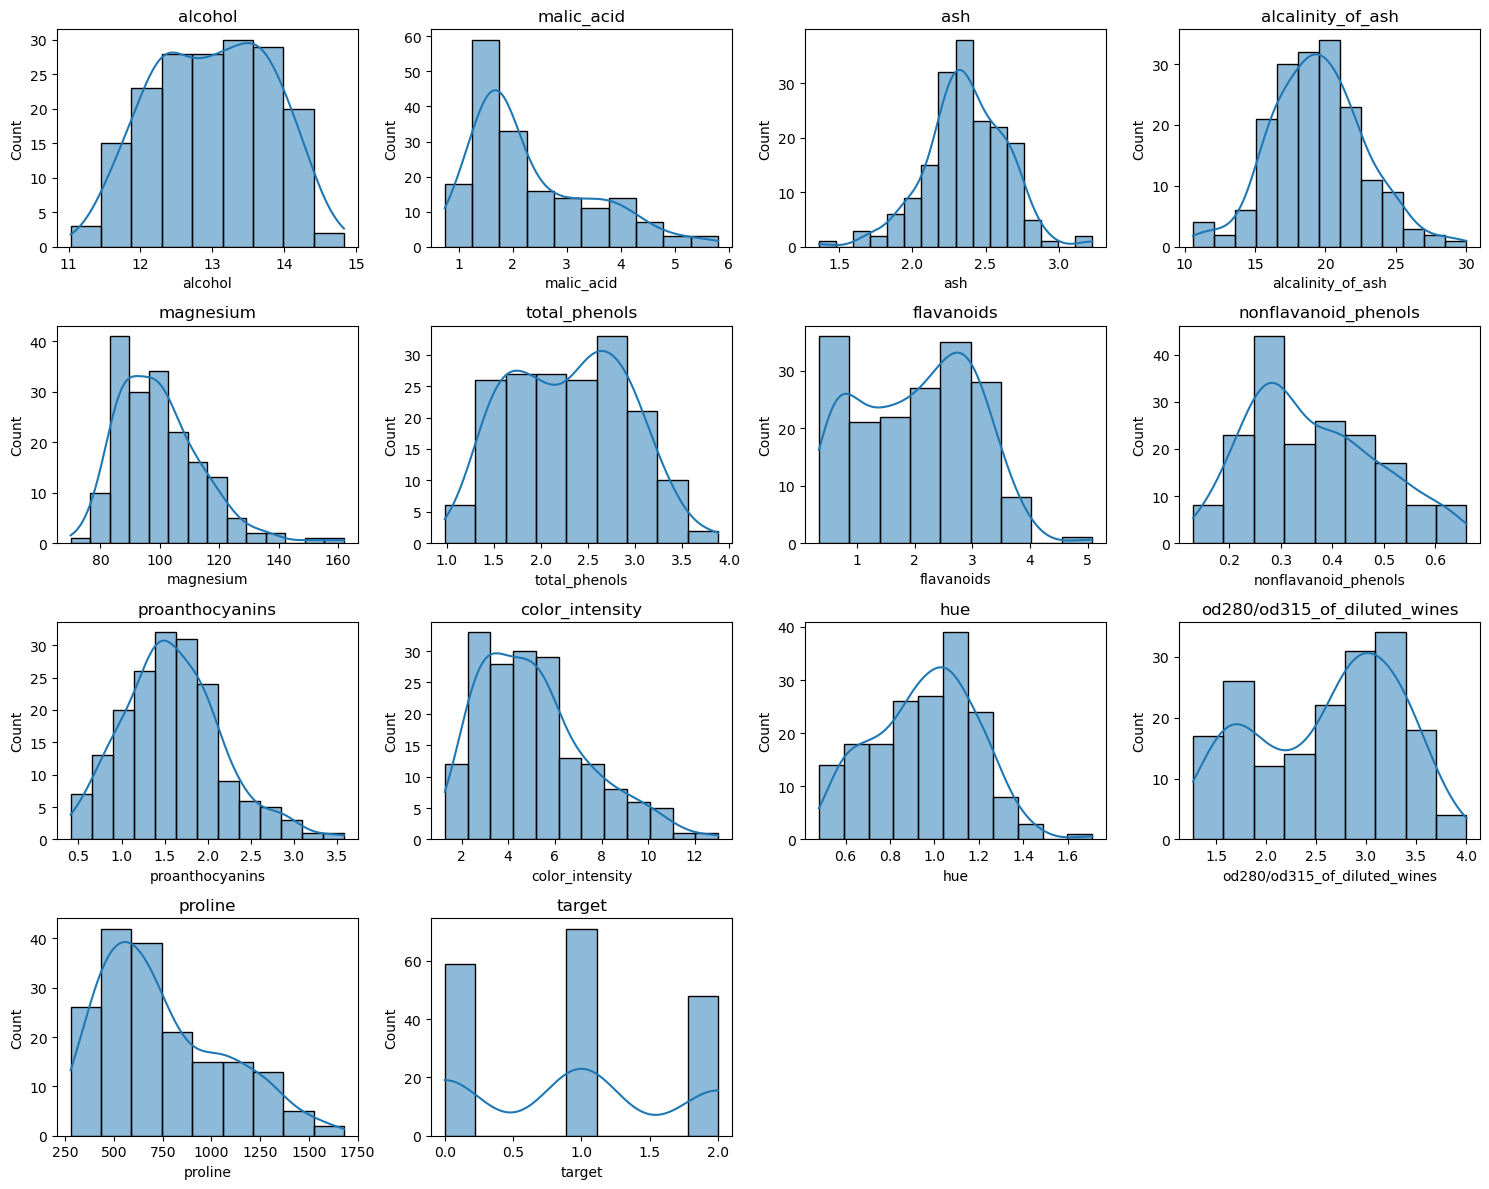

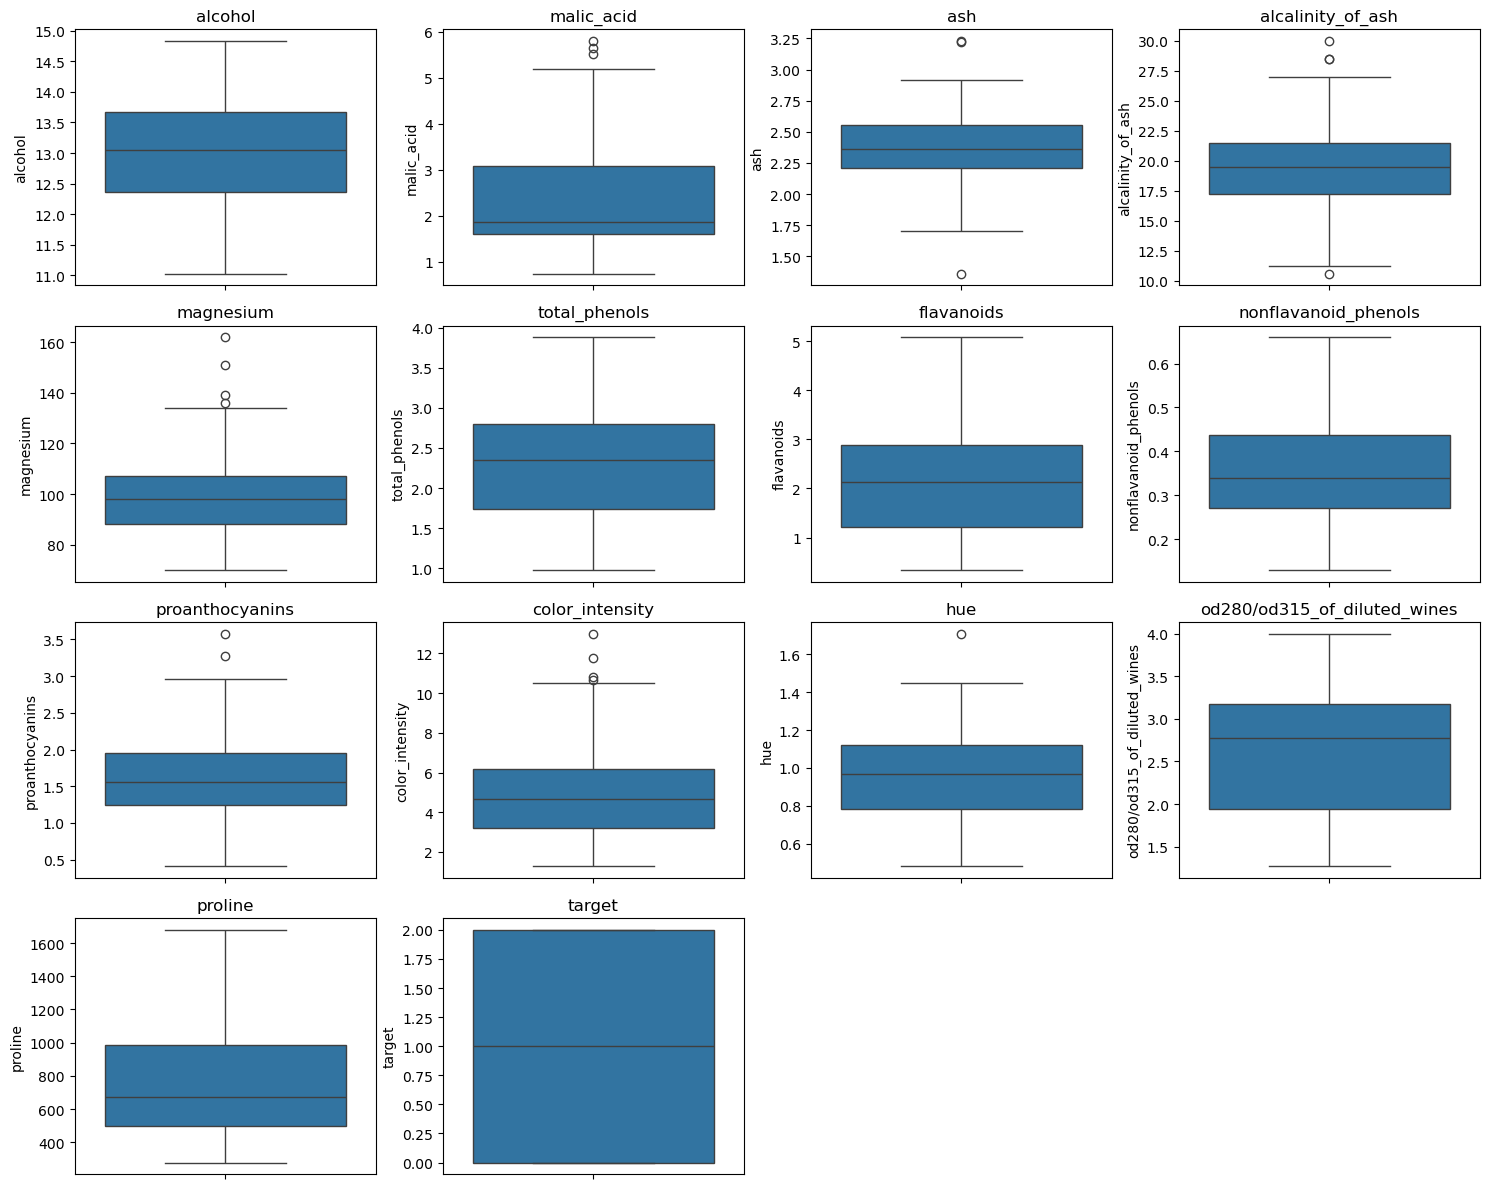

In [4]:
# Prendo i nomi di tutte le colonne, inclusa la colonna target
all_cols = df.columns

# Definisco il numero di righe e colonne per i subplot
n_cols = 4
n_rows = (len(all_cols) + n_cols - 1) // n_cols

# Creazione istogrammi per ciascuna variabile
plt.figure(figsize=(15, n_rows * 3))
for i, col in enumerate(all_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Box plot per identificare gli outlier
plt.figure(figsize=(15, n_rows * 3))
for i, col in enumerate(all_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

ANALISI approfondita di questi grafici di distribuzione univariata

 - Si avvicinano ad una distribuzione normale (cosiddette "a campana") alcune delle variabili predittive: la gradazione alcolica, l'alcalinità delle ceneri, la quantità di magnesio e l'intensità del colore. Tutte queste presentano comunque asimmetrie leggere;

 - Sono da considerare distribuzioni asimmetriche positive, quindi con concentrazione e picchi tra i valori più bassi dell'asse x, molte variabili: l'acido malico, le ceneri (probabilmente minerali), i fenoli non flavonoidi, le proantocianine e la prolina. Tutte questi grafici presentano una coda che si estende verso destra;

 - Sono quattro le distribuzioni asimmetriche negative: i fenoli totali, i flavanoidi, la tonalità e il rapporto OD280/OD315 che valuta il contenuto di proteine e polifenoli nei vini diluiti. In questi  grafici le maggiori frequenze stanno nella parte destra, dove i valori dell'asse x sono più alti. Le code infatti si estendono verso sinistra;

 - Il target è classificatorio tra i tre produttori, quindi la distribuzione è chiaramente multimodale con 3 picchi distinti con frequenza differente tra loro.

Gli outlier:

Negli istogrammi c'è continuità nel grafico con i valori più alti ma nei box plot sono evidenziati e posti fuori dalla "scatola" i valori troppo distanti dalla mediana che sono in un numero troppo esiguo per essere presi in considerazione; potrebbero essere eccezioni, casualità o errori di misurazione. 
In particolare sono visibili nell'acido malico, nelle ceneri e nell'alcalinità delle ceneri in entrambi gli estremi, nel magnesio, nelle proantocianine e nel colore.

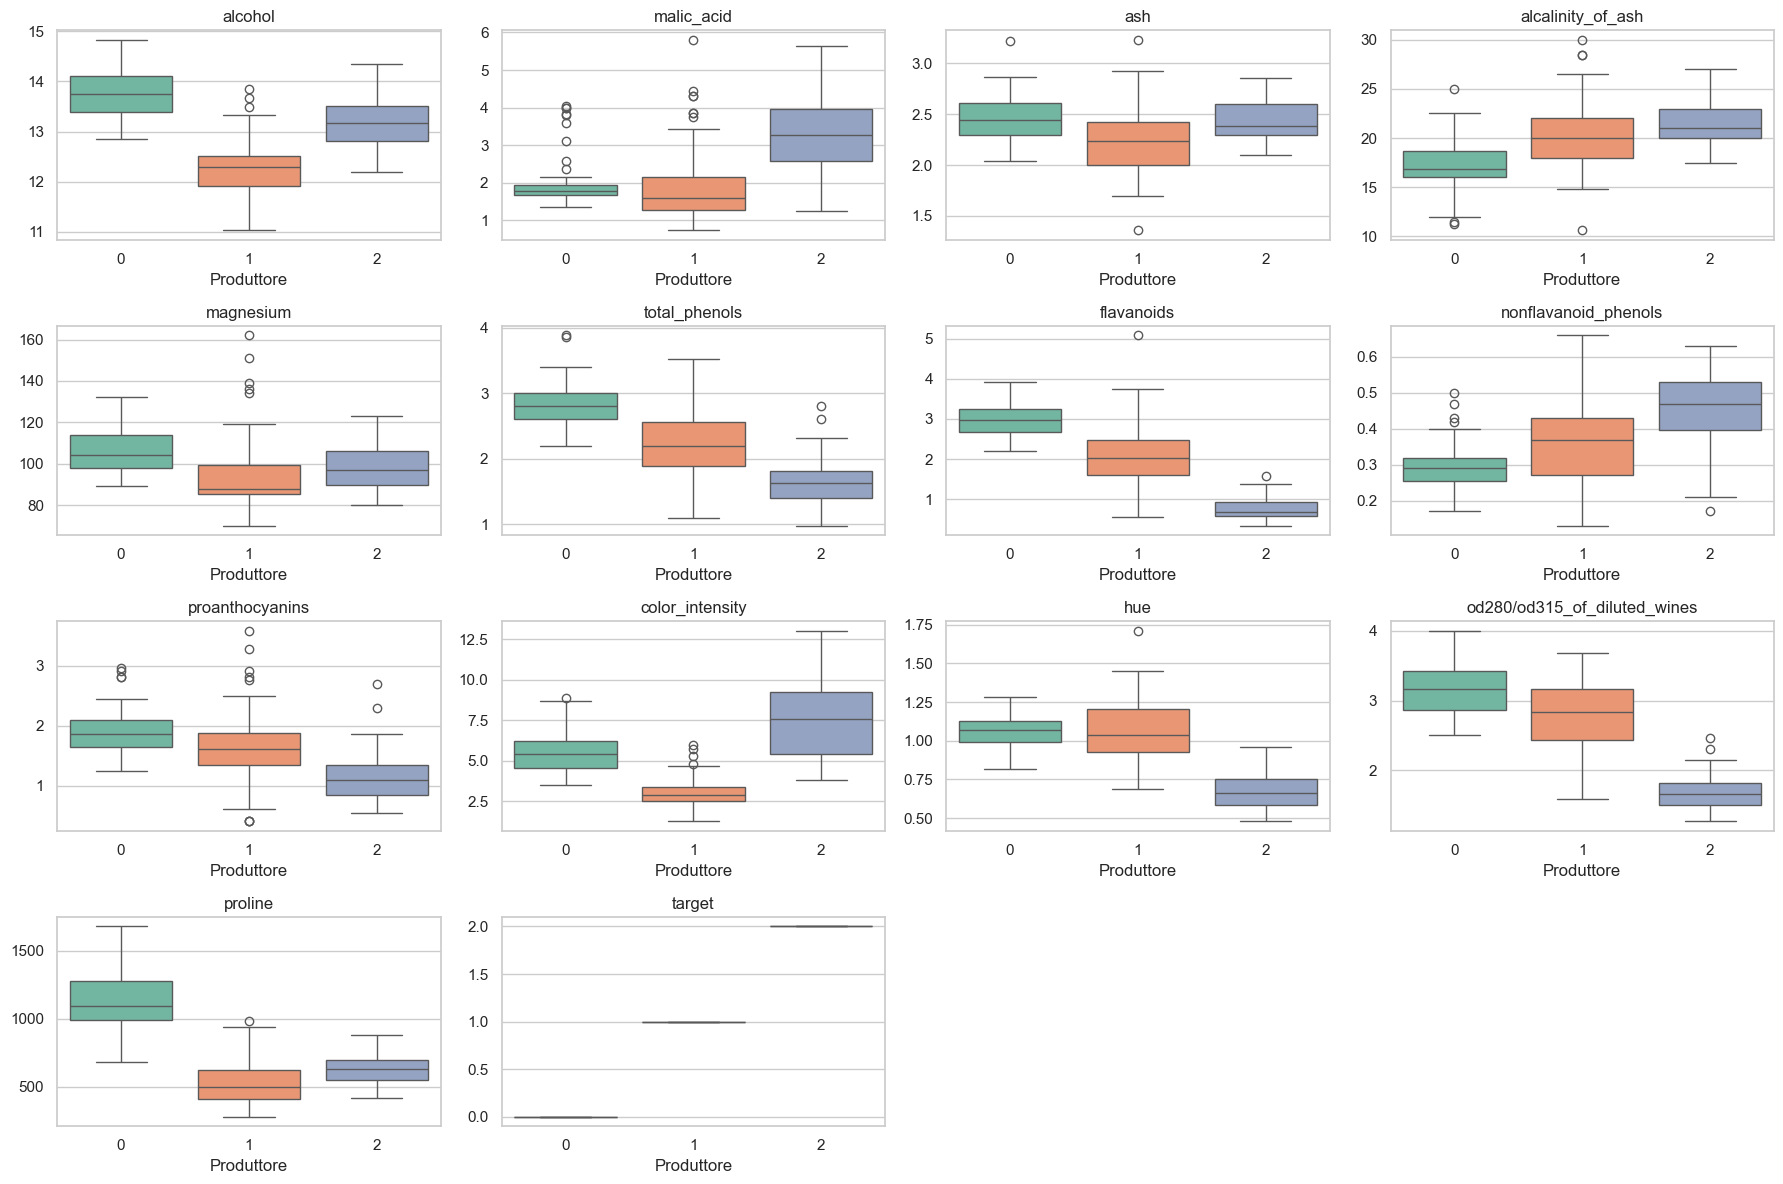

In [7]:
# Impostazioni grafiche
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(18, 12))

# Ottieni la lista delle feature numeriche (tutte tranne la classe)
features = [col for col in df.columns if col != 'class']

# Crea un boxplot per ciascuna feature
for i, feature in enumerate(features, 1):
    plt.subplot(4, 4, i)  # 4 righe, 4 colonne (ne abbiamo 13 feature)
    sns.boxplot(x='target', y=feature, data=df, hue='target', legend=False, palette="Set2")
    plt.title(feature)
    plt.xlabel("Produttore")
    plt.ylabel("")

plt.tight_layout()
plt.show()

ANALISI di questi grafici di distribuzione univariata

Innanzituto solo all'interno di due boxplot, quindi analizzando il valore di solo due feature, vi sono valori comuni a tutti e tre i produttori; queste feature sono il magnesio e le ceneri minerali. 

Per il resto delle feature la scatola di almeno 1 produttore è nettamente distante da almeno un altro:

- Al netto degli outliers, solo in due grafici i valori sono completamente distinti per tutti e 3 i produttori, senza alcun punto di contatto tra le scatole: si stratta delle features di fenoli totali e flavonoidi;

- Per quanto riguarda l'alcalinità delle ceneri e i fenoli non flavonoidi, invece, la scatola di 1 produttore ha contatti con entrambe le altre due, ma queste due non hanno punti di contatto tra loro;

- Il primo produttore, indicizzato come "0", al netto degli outliers, distingue nettamente i propri valori solo nel grafico della feature prolina;

- Il secondo produttore, indicizzato come "1", al netto degli ouliers, distingue nettamente i propri valori in due grafici: quello della gradazione alcolica e quello dell'intesità del colore;

- Il terzo produttore, indicizzato come "2" è sia il prduttore che presenta meno grafici con outliers (5), che quello che distingue i propri valori dagli altri produttori per un numero maggiore di features: 4. Queste sono i valori di acido malico, proantocianina, la tonalità e il rapporto OD280/OD315.

Nel complesso si può affermare che il terzo produttore è quello più identificabile, con dei valori maggiormente distinguibili e incasellabili.


OSSERVAZIONI OUTLIERS

Il secondo produttore ha 10 features che presentano outliers, il primo 7 ed il terzo 5. In generale, di valore anomalo ne appare almeno 1 in tutte le features. 
Nessuno di questi valori è assurdo, quindi negativo o impossibile per un dato contenuto chimico; rientrano ancora in un ordine di grandezza logico. Per questo motivo si possono considerare valori plausibili; caratteristiche specifiche dei produttori più che errori di misura.

Andando acora più nello specifico:
- gli outliers del terzo produttore non sembrano mai valori esageramente diversi, e spesso sono una coppia di valori fuori dalla scatola e non uno singolo. L'unico valore leggermente rilevante è nei fenoli non flavonoidi un valore molto più basso rispetto al "box". Nel complesso appaiono semplici eccezioni.

- quelli del primo produttore stesso e identico discorso. Nell'acido malico e nei fenoli non flavonoidi sono anche gruppi nutriti di outliers. Si possono considerare eccezioni o caratteristiche del produttore.

- quelli del secondo produttore in alcuni casi appaiono più distanti di quelli degli altri due produttori, sia verso l'alto che verso il basso. In almeno nella metà delle features con outlier, però, gli otliers sono gruppi nutriti.
3 di queste 5, poi, hanno altri valori più distanti anche dal "gruppo eccezione". Potrebbero essere errori di misura ma la frequenza di outlier di questo produttore porta a pensare più a caratteristiche realmente variegate nei suoi vini. Ad esempio vi è corrispondenza di misurazione in "ceneri minerali" con un outlier molto più alto e uno molto più basso che si ritrovano in "alcalinità delle ceneri": questo porta ad escludere degli errori di misurazione ma delle vere caratteristiche eccezionali e coerenti di due vini "fuori dal coro", essendo queste due features legate tra loro. Il secondo valore troppo in alto in "alcalinità" però potrebbe far pensare ad un errore di misurazione.  

In sintesi, gli outlier osservati appaiono in larga parte come variazioni legittime tra produttori. Tuttavia, per verificare l’effetto di tali valori sul modello predittivo, nella fase successiva verranno testate diverse strategie di gestione degli outlier.

2.2. Grafici di distribuzione bivariata: HEATMAP e PAIRPLOT

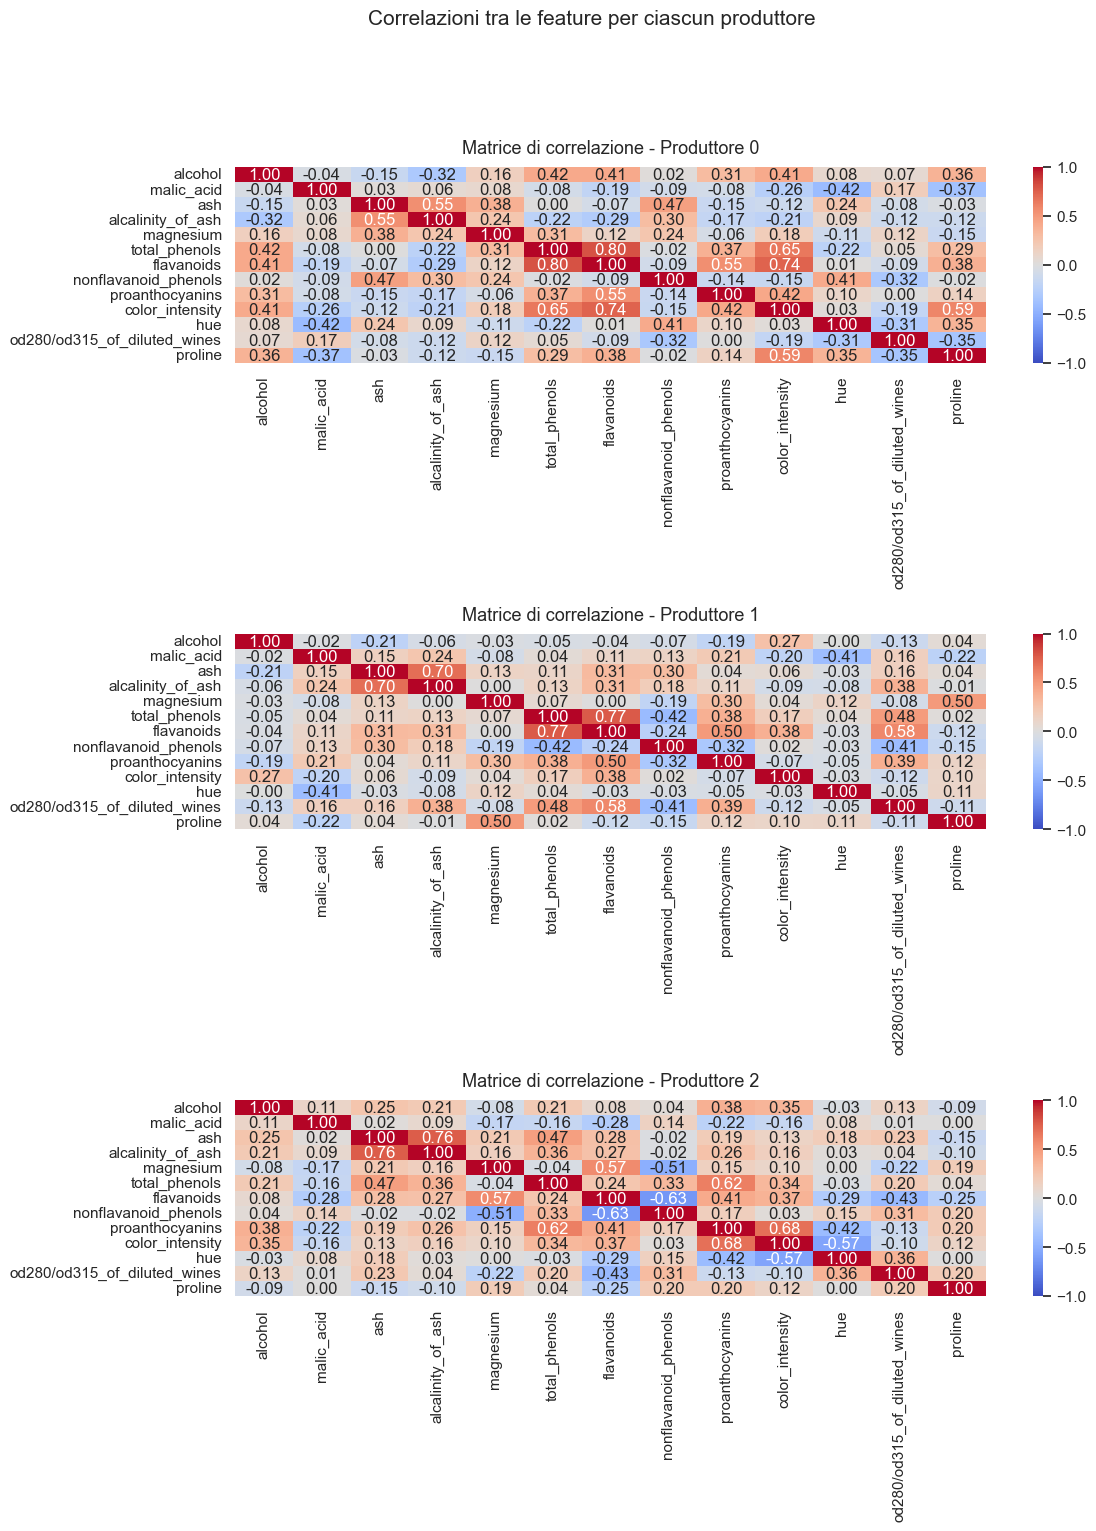

In [19]:
sns.set(style="white", font_scale=1.0)

# Rende le classi stringhe (es. 'class_0', 'class_1', ...)
df['target'] = df['target'].astype(str)

# Ottieni le classi uniche ordinate
classes = sorted(df['target'].unique())

# Crea la figura con 3 subplot (uno per classe)
fig, axes = plt.subplots(len(classes), 1, figsize=(12, 5 * len(classes)))

# Se c'è solo una classe, axes non è una lista — forza la lista
if len(classes) == 1:
    axes = [axes]

for i, cls in enumerate(classes):
    subset = df[df['target'] == cls].drop(columns='target')
    corr = subset.corr()

    sns.heatmap(
        corr,
        annot=True,          # mostra i valori numerici
        fmt=".2f",           # formato a due decimali
        cmap="coolwarm",     # palette leggibile
        vmin=-1, vmax=1,
        square=False,
        ax=axes[i],
        cbar=True
    )

    axes[i].set_title(f"Matrice di correlazione - Produttore {cls}", fontsize=13, pad=10)

plt.suptitle("Correlazioni tra le feature per ciascun produttore", fontsize=15, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

ANALISI grafici Heatmap per produttore

Nei vini del primo produttore (indicizzato come 0), le features che hanno maggiore correlazione sono in ordine:
- Flavonoidi e fenoli totali con una percentuale dell'80% di correlazione positiva;
- Flavonoidi e intesità del colore con il 74% di correlazione positiva.

Nei vini del secondo produttore (indicizzato come 1):
- Flavonoidi e fenoli totali con il 77% di correlazione positiva;
- Ceneri minerali e alcalinità delle ceneri con il 70% di correlazione positiva;

Nei vini del terzo produttore (indicizzato come 2):
- Ceneri minerali e alcalinità delle ceneri con il 76% di correlazione positiva;
- Intensità del colore e proantocianine con il 68% di correlazione positiva.

Nel complesso i vini del primo produttore hanno percentuali medie di correlazione tra le features, sia negativa che positiva, leggermente più alte degli altri due produtori. Il grafico è leggermente più scuro.

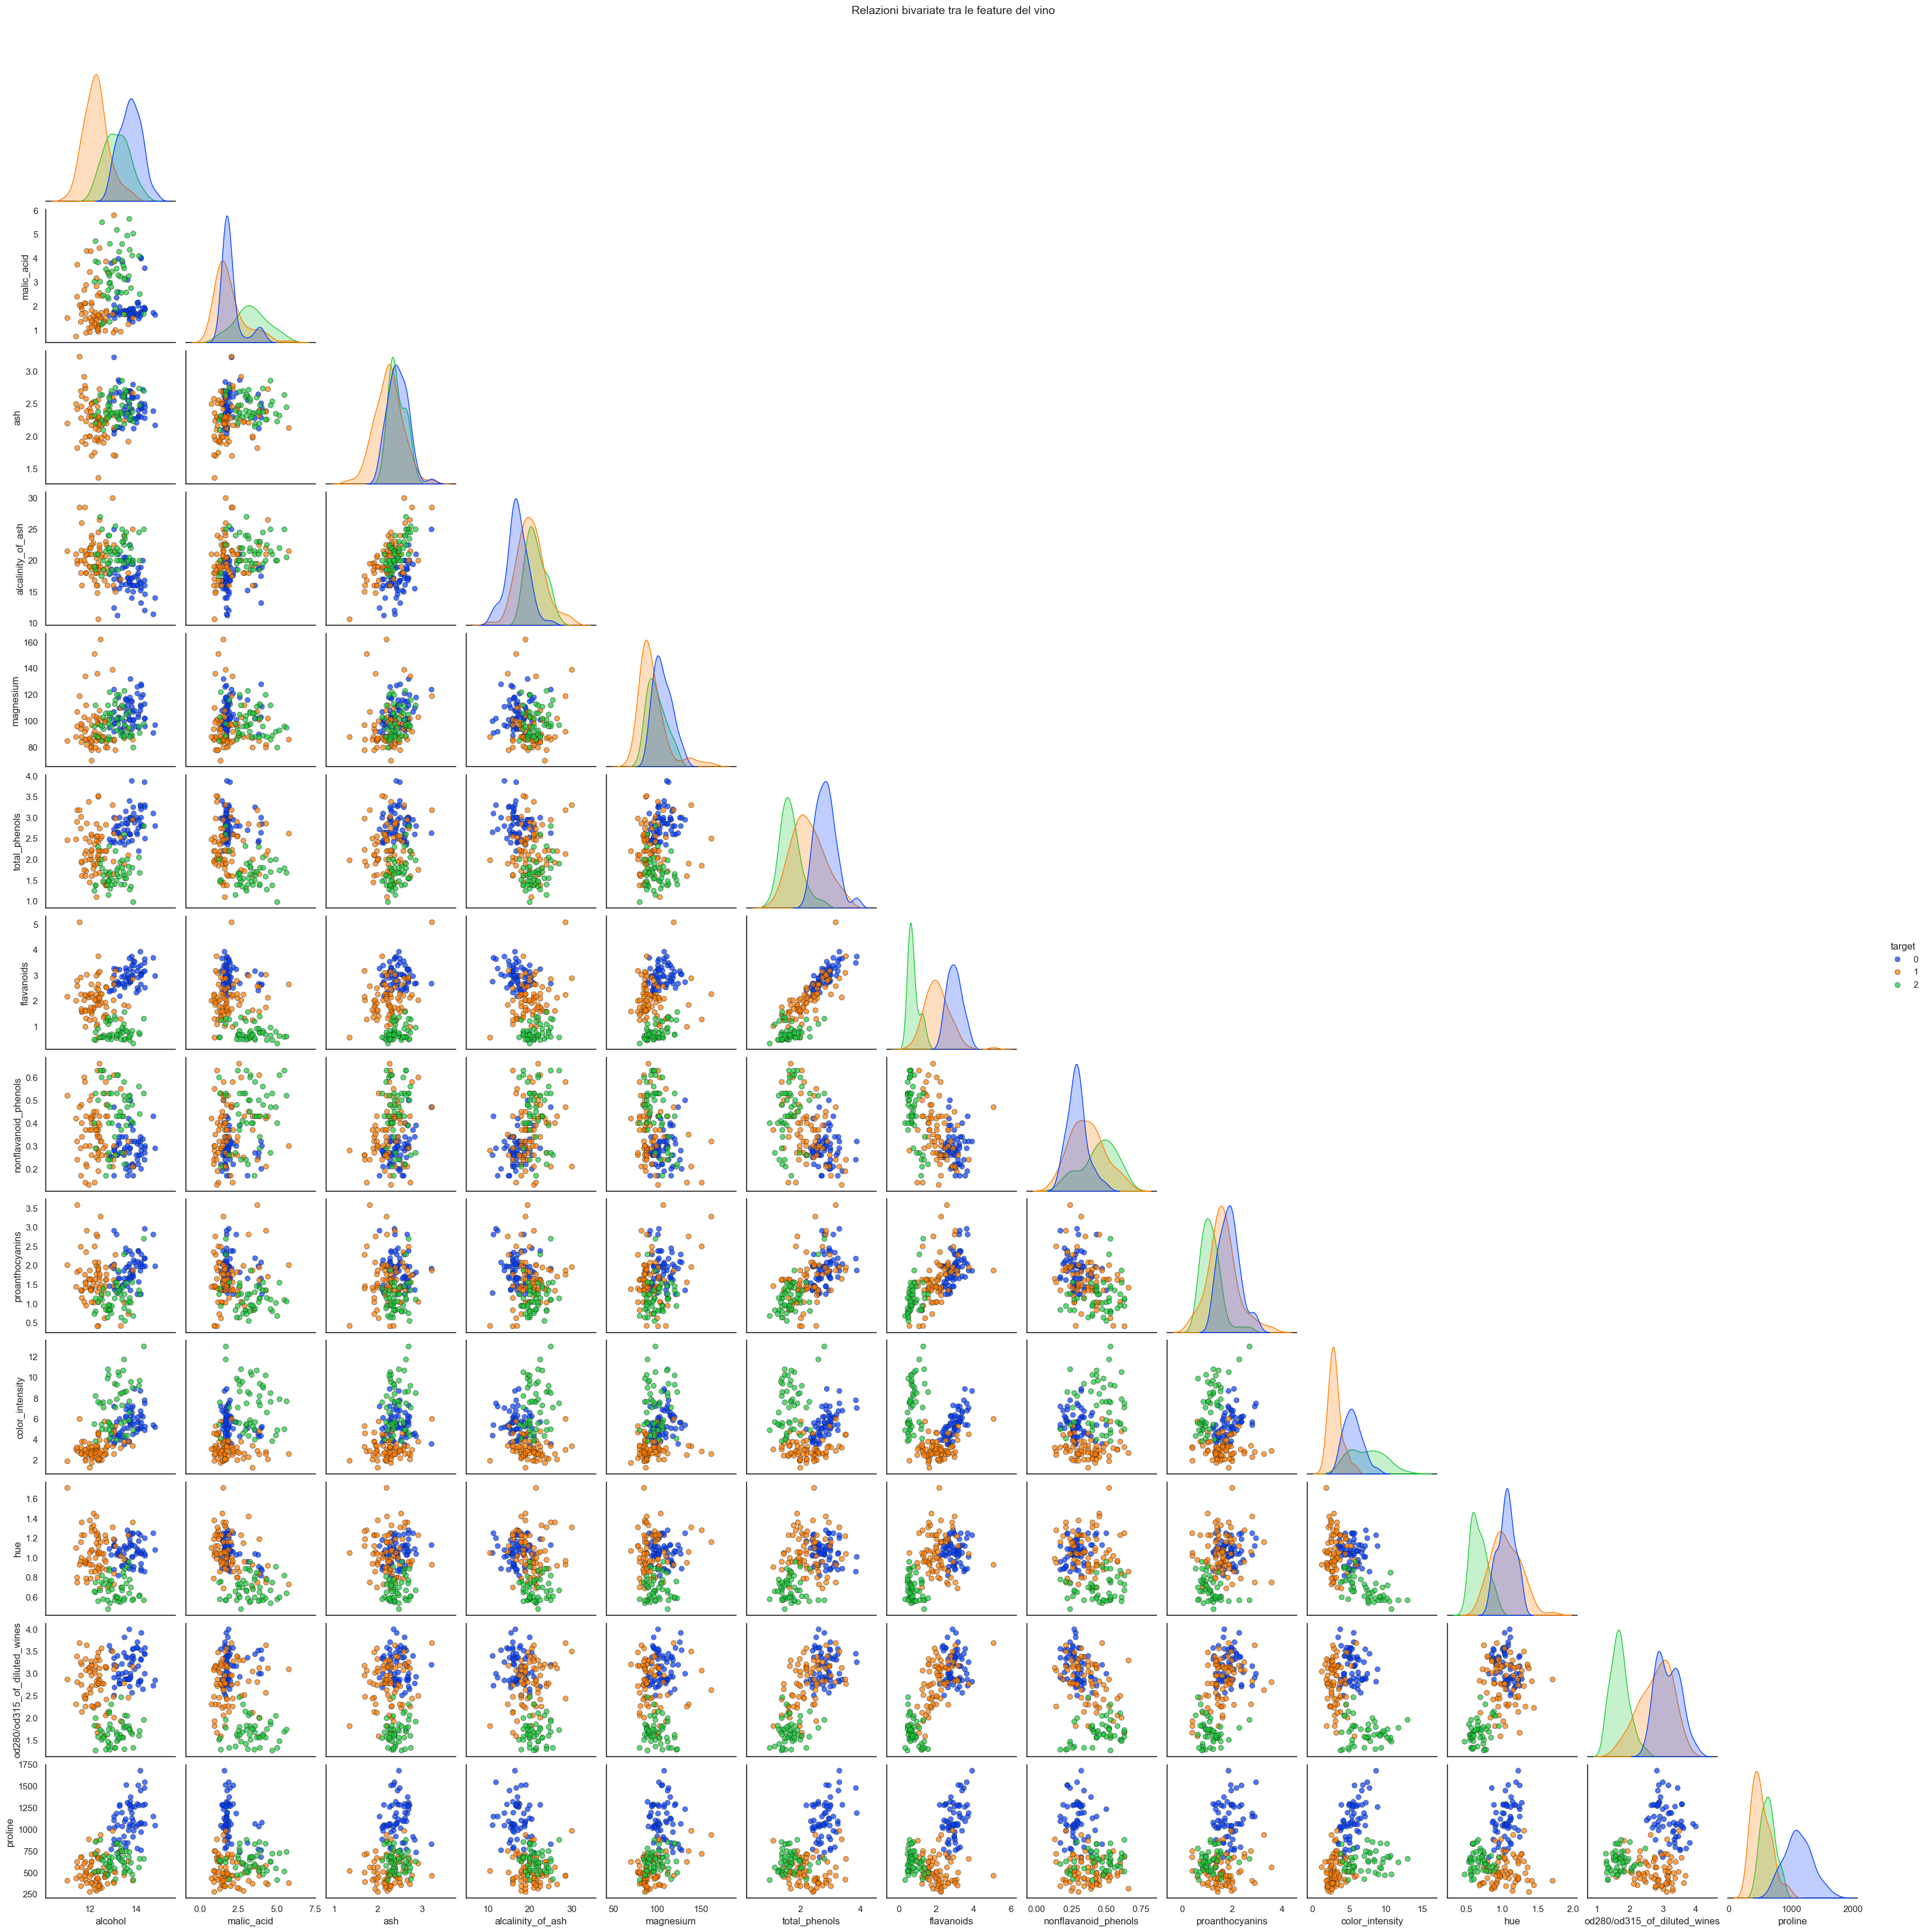

In [24]:
# Pairplot: coppie di variabili, colorate per produttore
sns.pairplot(df, hue='target', corner=True, diag_kind='kde', palette='bright',
             plot_kws={'alpha': 0.7, 's': 40, 'edgecolor': 'k'})
plt.suptitle("Relazioni bivariate tra le feature del vino", y=1.02, fontsize=14)
plt.show()

Da questo pairplot si possono notare visivamente le aree costituite dai valori dei vini di ogni produttore per ogni coppia di feature.

A colpo d'occhio si possono notare le aree maggiormente distinte fra loro: fra queste sembra spiccare la combinazione prolina-rapporto od280/od315.

Si può avere però anche un calcolo matematico preciso che prescinde dal colpo d'occhio attraverso una funzione:

In [25]:
# Assumiamo che la colonna 'target' contenga le etichette dei produttori
classes = df['target'].unique()
features = [col for col in df.columns if col != 'target']

def separability_score(x, y, data, label_col='target'):
"""
Calcola un indice quantitativo di separabilità tra produttori di vino 
(per un dataset con etichette di classe) analizzando tutte le coppie di feature numeriche.

L'analisi misura, per ogni coppia di variabili (X, Y), quanto bene le classi 
(target) sono separate nel piano bidimensionale definito da quelle due feature.
Il punteggio di separabilità è definito come il rapporto tra:
- la distanza media tra i centroidi delle classi (inter-class distance)
- la dispersione media interna a ciascuna classe (intra-class spread)

Un valore più alto dell'indice indica una migliore capacità discriminante 
della coppia di feature nel distinguere i produttori.

Steps principali:
1. Definizione della funzione `separability_score()` che calcola l'indice per una coppia di feature.
2. Iterazione su tutte le combinazioni di feature (senza ripetizioni).
3. Creazione di un DataFrame (`sep_df`) che contiene per ogni coppia:
   - nome della prima feature
   - nome della seconda feature
   - valore dell'indice di separabilità
4. Ordinamento delle coppie in base alla capacità discriminante e visualizzazione delle prime 10.

Parameters
----------
data : pandas.DataFrame
    Dataset contenente le feature numeriche e la colonna target.
label_col : str, optional
    Nome della colonna target che identifica le classi (default = 'target').

Returns
-------
sep_df : pandas.DataFrame
    Tabella con le coppie di feature e i relativi indici di separabilità, 
    ordinata in ordine decrescente.

Note
----
- L'indice non ha un'unità di misura assoluta: serve a confrontare 
  la separabilità relativa tra diverse coppie di feature.
- Un punteggio molto alto indica che le classi sono ben distinte 
  e con bassa sovrapposizione nei dati.
- Utile per identificare visivamente e statisticamente 
  le variabili più informative per la classificazione.
"""
    centers = []
    spreads = []
    for c in data[label_col].unique():
        subset = data[data[label_col] == c]
        centers.append(subset[[x, y]].mean().values)
        spreads.append(subset[[x, y]].std().mean())  # media della deviazione std sulle due variabili
    centers = np.array(centers)
    spreads = np.array(spreads)
    # distanza media tra i centroidi delle classi
    inter_dist = np.mean([
        np.linalg.norm(centers[i] - centers[j])
        for i in range(len(centers)) for j in range(i+1, len(centers))
    ])
    # dispersione media intra-classe
    intra_spread = np.mean(spreads)
    # indice di separabilità (maggiore = meglio)
    return inter_dist / intra_spread if intra_spread > 0 else np.nan

# Calcolo la separabilità per tutte le coppie di feature
results = []
for x, y in itertools.combinations(features, 2):
    score = separability_score(x, y, df)
    results.append({'Feature_X': x, 'Feature_Y': y, 'Separability': score})

sep_df = pd.DataFrame(results)

# Ordina per le coppie più discriminanti
sep_df = sep_df.sort_values(by='Separability', ascending=False).reset_index(drop=True)

# Mostra le prime 10
print("🔝 Le 10 coppie di feature più separanti tra produttori:\n")
print(sep_df.head(10))

🔝 Le 10 coppie di feature più separanti tra produttori:

                      Feature_X             Feature_Y  Separability
0                    flavanoids  nonflavanoid_phenols      5.147001
1                    flavanoids                   hue      4.902253
2          nonflavanoid_phenols               proline      4.826132
3                           hue               proline      4.825005
4                           ash               proline      4.822139
5  od280/od315_of_diluted_wines               proline      4.818289
6                 total_phenols               proline      4.817145
7                    flavanoids               proline      4.815675
8               proanthocyanins               proline      4.815372
9                       alcohol               proline      4.814344


Come presupposto, a colpo d'occhio difficilmente si può avere una stima precisa, ed infatti la combinazione prolina-rapporto od280/od315 non è quella con l'indice più alto ma è solo al quinto posto. 

La combinazione flavonoidi-fenoli non flavonoidi (che daltronde corrisponde a due opposti) è quella dove le aree sono effettivamente meglio distinte. Inoltre nel grafico queste aree sembrano avere la stessa direzione: si avvicinano a 3 picchi diversi il verticale, come se il grafico fosse suddiviso in porzioni sull'asse delle ascisse. 

Adesso è interessante valutare una analisi multivariata che possa far capire se le classi sono separabili globalmente attraverso una PCA (Principal Component Analysis).


2.3 Distribuzione multivariata: PCA

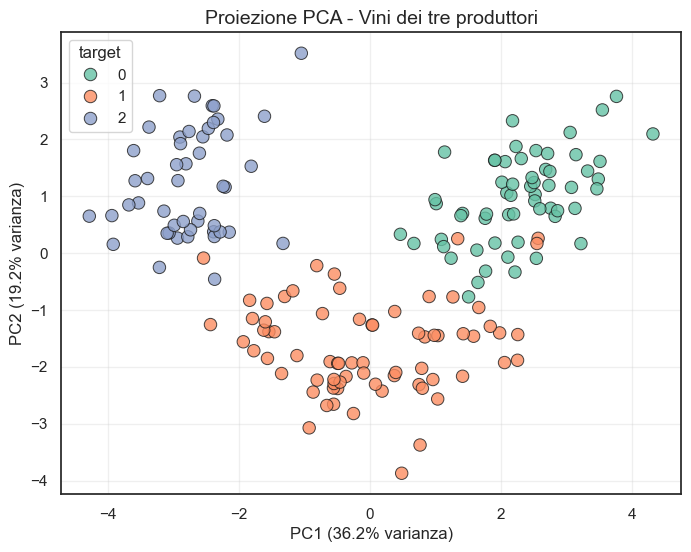

Varianza spiegata da ciascuna componente:
  PC1: 36.20%
  PC2: 19.21%

Totale varianza spiegata dalle prime 2 componenti: 55.41%


In [29]:
# Separa le feature e la classe
X = df.drop(columns='target')
y = df['target']

# Normalizza le feature (fondamentale per la PCA!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applica la PCA
pca = PCA(n_components=2)  # puoi mettere 3 per una vista 3D
X_pca = pca.fit_transform(X_scaled)

# Crea un nuovo DataFrame con le componenti
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y.values

# Grafico PCA
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target', palette='Set2', s=80, alpha=0.8, edgecolor='k')
plt.title('Proiezione PCA - Vini dei tre produttori', fontsize=14)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% varianza)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% varianza)')
plt.grid(True, alpha=0.3)
plt.show()

# Varianza spiegata complessiva
print("Varianza spiegata da ciascuna componente:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"  PC{i+1}: {ratio*100:.2f}%")

print(f"\nTotale varianza spiegata dalle prime 2 componenti: {pca.explained_variance_ratio_[:2].sum()*100:.2f}%")

In [30]:
# Mostra il contributo di ciascuna variabile
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)
print("\nContributo delle feature alle componenti principali:")
print(loadings.sort_values(by='PC1', ascending=False))


Contributo delle feature alle componenti principali:
                                   PC1       PC2
flavanoids                    0.422934 -0.003360
total_phenols                 0.394661  0.065040
od280/od315_of_diluted_wines  0.376167 -0.164496
proanthocyanins               0.313429  0.039302
hue                           0.296715 -0.279235
proline                       0.286752  0.364903
alcohol                       0.144329  0.483652
magnesium                     0.141992  0.299634
ash                          -0.002051  0.316069
color_intensity              -0.088617  0.529996
alcalinity_of_ash            -0.239320 -0.010591
malic_acid                   -0.245188  0.224931
nonflavanoid_phenols         -0.298533  0.028779


Le prime due componenti principali spiegano circa il 55% della varianza complessiva, valore sufficiente per rappresentare in modo sintetico ma informativo le principali differenze tra i campioni di vino.

Le nuvole di punti dei tre produttori si possono definire ben separate tra loro: le aree del primo e del terzo produttore sono nettamente distinte, senza alcun punto di contatto tra loro. L'area del secondo produttore inve invade con alcuni punti quella degli altri due.

è PC1 a separare nettamente il primo produttore dal terzo: i vini del primo sono nei valori positivi mentre quelli del terzo in quelli negativi.
PC2 invece prova a distinguere il secondo produttore, i cui vini hanno valori negativi o vicini allo 0, dai vini degli altri produttori che hanno valori maggiori di -1.

RIFLESSIONI EDA

Da queste analisi si vede come tantissime feature sono fortemente correlate tra di loro. Questo può creare problemi nei modelli lineari (come la Logistic Regression) perché i coefficienti possono diventano instabili, piccole variazioni nei dati portano a grandi cambiamenti nei parametri, la generalizzazione peggiora.

La PCA trasforma le variabili originali in nuove feature non correlate (ortogonali), quindi il modello impara su assi indipendenti e vi è più stabilità numerica e statistica.

Viene filtrato via il rumore, quindi il modello impara pattern più generali, non dettagli accidentali del training set.
In sostanza, riducendo la complessità riduce la possibilità di overfitting e rende più stabili le prestazioni tra training e test. Grazie alla PCA in modello dovrebbe predire più per struttura e non per "memoria".


3. GESTIONE degli OUTLIERS

In [10]:
# due copie del DataFrame
df_clean = df.copy()
df_cap = df.copy()

In [11]:
def remove_outliers_iqr(data, k=1.5):
    """
    Rimuove gli outlier da un DataFrame utilizzando il metodo dell'Interquartile Range (IQR).

    Per ogni colonna numerica, vengono calcolati il primo (Q1) e il terzo quartile (Q3),
    e l'intervallo interquartile IQR = Q3 - Q1. I valori che si trovano al di fuori
    dell'intervallo [Q1 - k*IQR, Q3 + k*IQR] vengono considerati outlier e rimossi.
    Una riga viene eliminata se presenta almeno un valore anomalo in una delle colonne numeriche.

    Parametri
    ----------
    data : pandas.DataFrame
        Dataset di input contenente le variabili numeriche da analizzare.
    k : float, opzionale (default=1.5)
        Moltiplicatore dell'IQR per definire la soglia di tolleranza. 
        Valori più alti rendono la regola meno severa.

    Restituisce
    -----------
    pandas.DataFrame
        Una copia del dataset originale senza le osservazioni considerate outlier.
    
    Note
    ----
    Il metodo IQR è robusto rispetto a distribuzioni non normali
    e rappresenta una tecnica standard per la rimozione automatica degli outlier.
    Tuttavia, può rimuovere righe multiple se un solo attributo presenta valori estremi.
    """
    df_clean = data.copy()
    for col in data.select_dtypes(include='number').columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower, upper = q1 - k * iqr, q3 + k * iqr
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

df_no_outliers = remove_outliers_iqr(df)

In [12]:
def cap_floor(data, lower_q=0.05, upper_q=0.95):
    """
    Applica una strategia di cap/floor per la gestione degli outlier sulle variabili numeriche del dataset.

    La funzione sostituisce i valori estremi di ciascuna feature numerica con i corrispondenti quantili
    inferiori (cap) e superiori (floor), limitando l’influenza di valori anomali senza rimuovere osservazioni.

    Parametri
    ----------
    data : pandas.DataFrame
        Dataset di input contenente le variabili numeriche da trattare.
    lower_q : float, opzionale (default=0.05)
        Quantile inferiore sotto il quale i valori vengono sostituiti con il valore del quantile stesso.
    upper_q : float, opzionale (default=0.95)
        Quantile superiore sopra il quale i valori vengono sostituiti con il valore del quantile stesso.

    Ritorna
    -------
    pandas.DataFrame
        Copia del dataset originale con le variabili numeriche "cappate" ai limiti inferiori e superiori.

    Note
    ----
    - Questa tecnica è utile quando gli outlier sono legittimi ma troppo influenti per i modelli sensibili 
      (come la regressione lineare o logistica).
    - A differenza della rimozione tramite IQR, il cap/floor mantiene la dimensione originale del dataset.
    """
    df_cap = data.copy()
    for col in data.select_dtypes(include='number').columns:
        lower = data[col].quantile(lower_q)
        upper = data[col].quantile(upper_q)
        df_cap[col] = np.clip(data[col], lower, upper)
    return df_cap

df_capped = cap_floor(df)

Durante l’analisi univariata e bivariata sono stati individuati diversi valori anomali (outlier) nelle variabili numeriche.
Sebbene nessuno di questi appaia come errore evidente di misurazione, la loro presenza potrebbe comunque influenzare la qualità del modello predittivo, soprattutto nel caso di modelli lineari come la regressione logistica, che sono sensibili ai valori estremi.

Per questo motivo, dopo aver mantenuto una copia originale del dataset, sono state testate due diverse strategie di gestione degli outlier:

- Rimozione tramite IQR (Interquartile Range). Elimina completamente le osservazioni con valori troppo distanti dai quartili.
È utile quando si sospetta che gli outlier non rappresentino comportamenti reali o possano distorcere il modello.
Lo svantaggio è la perdita di dati, quindi va confrontato l’impatto sul modello.

- Capping/Flooring tramite quantili (Cap-Floor). Non elimina righe, ma “limita” i valori estremi sostituendoli con i corrispondenti quantili inferiori/superiori.
È una soluzione più conservativa, adatta quando gli outlier sono plausibili ma troppo influenti.
Permette di mantenere intatta la dimensione del dataset.

Infine, entrambe le versioni verranno valutate in parallelo (insieme al dataset originale) attraverso il modello scelto, per verificare empiricamente se e quanto la gestione degli outlier incide sulle prestazioni del modello.

4. PREPARAZIONE dei DATI per la MODELLAZIONE (Split dataset)

In [55]:
datasets = { 'Originale': df, 
            'Senza_outlier': df_no_outliers, 
            'Capped': df_capped }

Il dataset Wine presenta una lieve forma di sbilanciamento tra le classi (59, 71 e 48 campioni).
Sebbene non si tratti di un imbalance severo, è comunque opportuno considerare metriche più robuste della semplice accuracy, come precision, recall e F1-score per classe, poiché permettono di valutare se il modello sta privilegiando la classe più numerosa o se riesce a generalizzare in modo equilibrato.

Per dataset così piccoli sarebbe possibile applicare tecniche di resampling (SMOTE, oversampling o undersampling), ma nel caso specifico non risultano necessarie: lo sbilanciamento è lieve e il rischio di introdurre rumore o duplicati sarebbe maggiore del beneficio atteso.

L’uso di stratify=y nella suddivisione train/test è invece pienamente giustificato. La stratificazione garantisce che la proporzione tra le classi rimanga coerente nei due insiemi, evitando scenari in cui una classe è sottorappresentata nel train set oppure sovrarappresentata nel test set. Questo è particolarmente importante su dataset di piccole dimensioni e contribuisce alla stabilità complessiva delle valutazioni ottenute.

In [14]:
def split_datasets(datasets, test_size=0.25, random_state=42, stratify=True):
    """
    Suddivide più versioni di uno stesso dataset (originale, senza outlier, capped, ecc.)
    in set di addestramento e test, restituendo i risultati in un dizionario strutturato.

    Parametri
    ----------
    datasets : dict
        Dizionario contenente le diverse versioni del dataset.
        Le chiavi devono essere etichette (es. 'Originale', 'Senza_outlier', 'Capped')
        e i valori devono essere DataFrame con la colonna 'target' come variabile dipendente.
    test_size : float, opzionale (default=0.25)
        Percentuale di dati da destinare al set di test.
    random_state : int, opzionale (default=42)
        Semina casuale per garantire la riproducibilità della divisione.
    stratify : bool, opzionale (default=True)
        Se True, mantiene la proporzione delle classi di 'target' nel train e test set.

    Ritorna
    -------
    dict
        Dizionario con la struttura:
        {
            'Nome_dataset': {
                'X_train': ..., 'X_test': ...,
                'y_train': ..., 'y_test': ...
            },
            ...
        }
    """

    results = {}

    for name, data_version in datasets.items():
        print(f"\n🔹 Dataset: {name}")

        X = data_version.drop(columns='target')
        y = data_version['target']

        stratify_param = y if stratify else None

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state, stratify=stratify_param
        )

        print(f"  ▪️ Train: X={X_train.shape}, y={y_train.shape}")
        print(f"  ▪️ Test:  X={X_test.shape}, y={y_test.shape}")

        results[name] = {
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test
        }

    return results

In [15]:
split_results = split_datasets(datasets)


🔹 Dataset: Originale
  ▪️ Train: X=(133, 13), y=(133,)
  ▪️ Test:  X=(45, 13), y=(45,)

🔹 Dataset: Senza_outlier
  ▪️ Train: X=(120, 13), y=(120,)
  ▪️ Test:  X=(41, 13), y=(41,)

🔹 Dataset: Capped
  ▪️ Train: X=(133, 13), y=(133,)
  ▪️ Test:  X=(45, 13), y=(45,)


4. TRAINING

SCELTA DEL MODELLO PREDITTIVO

Per la fase di classificazione è stato scelto un modello di Regressione Logistica Multiclasse, in quanto particolarmente adatto a dati numerici e a problemi di classificazione supervisionata e 

Dopo la riduzione dimensionale tramite PCA, le variabili risultano tra loro ortogonali e standardizzate, condizioni ottimali per l’applicazione di un modello lineare.

La regressione logistica consente inoltre di stimare la probabilità di appartenenza di ciascun campione a una determinata classe (produttore), mantenendo un buon equilibrio tra accuratezza, interpretabilità e stabilità.

A differenza di modelli più complessi (come Random Forest o SVM), la regressione logistica permette di analizzare in modo diretto il contributo delle componenti principali alla separazione delle classi, rendendola la scelta più coerente con gli obiettivi di questa analisi.

Si è scelto di adottare una cross-validation standard anziché una nested cross-validation, poiché il modello utilizzato è lineare e regolarizzato, e il dataset Wine presenta una chiara separazione tra classi.
L’approccio classico si presuppone quindi sufficiente a fornire una stima attendibile delle performance, mantenendo tempi computazionali più contenuti e una struttura di validazione più semplice, coerente con gli obiettivi analitici del progetto.

In [16]:
def train_logistic_pca(X_train, y_train, cv=5, random_state=42, verbose=True):
    """
    Esegue una pipeline completa di modellazione con:
    StandardScaler → PCA → Regressione Logistica,
    includendo la ricerca degli iperparametri tramite GridSearchCV.

    Parametri
    ----------
    X_train : pandas.DataFrame
        Set di addestramento con le sole variabili indipendenti.
    y_train : pandas.Series
        Target corrispondente al set di addestramento.
    cv : int, opzionale (default=5)
        Numero di fold per la cross-validation interna di GridSearchCV.
    random_state : int, opzionale (default=42)
        Semina casuale per la riproducibilità della regressione logistica e della PCA.

    Ritorna
    -------
    grid : GridSearchCV
        Oggetto GridSearchCV già addestrato (fit), contenente:
        - `best_estimator_`: il modello ottimizzato
        - `best_params_`: i parametri ottimali trovati
        - `best_score_`: l’accuratezza media in cross-validation

    Note
    ----
    - La pipeline standardizza i dati prima della PCA per garantire che tutte le feature
      contribuiscano equamente alla riduzione dimensionale.
    - La ricerca degli iperparametri ottimizza simultaneamente:
        * `pca__n_components`: numero di componenti principali
        * `clf__C`: coefficiente di regolarizzazione della regressione logistica
    """
    
    # Definizione della pipeline
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(random_state=random_state)),
        ('clf', LogisticRegression(max_iter=2000, solver='lbfgs', random_state=random_state))
    ])

    # Griglia degli iperparametri
    param_grid = {
        'pca__n_components': [2, 4, 6, 8, 10, 13],
        'clf__C': [0.01, 0.1, 1, 10, 100]
    }

    # GridSearchCV con cross-validation
    grid = GridSearchCV(
        pipe,
        param_grid=param_grid,
        cv=cv,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )

    # Addestramento
    grid.fit(X_train, y_train)

    if verbose:
        print(f"\n✅ Best params: {grid.best_params_}")
        print(f"✅ Best CV accuracy: {grid.best_score_:.4f}\n")

    return grid

In [23]:
grid_originale = train_logistic_pca(
    split_results['Originale']['X_train'],
    split_results['Originale']['y_train'],)

grid_no_out = train_logistic_pca(
    split_results['Senza_outlier']['X_train'],
    split_results['Senza_outlier']['y_train'])

grid_capped = train_logistic_pca(
    split_results['Capped']['X_train'],
    split_results['Capped']['y_train'])

Fitting 5 folds for each of 30 candidates, totalling 150 fits

✅ Best params: {'clf__C': 1, 'pca__n_components': 13}
✅ Best CV accuracy: 0.9849

Fitting 5 folds for each of 30 candidates, totalling 150 fits

✅ Best params: {'clf__C': 0.01, 'pca__n_components': 4}
✅ Best CV accuracy: 0.9833

Fitting 5 folds for each of 30 candidates, totalling 150 fits

✅ Best params: {'clf__C': 0.01, 'pca__n_components': 8}
✅ Best CV accuracy: 0.9846



Per la ricerca degli iperparametri ottimali è stato utilizzato un approccio Grid Search con cross-validation a 5 fold.

Sono stati validati due iperparametri principali:
il numero di componenti principali della PCA (pca__n_components), per determinare la quantità di varianza utile da mantenere;
il coefficiente di regolarizzazione della regressione logistica (clf__C), che controlla la complessità del modello.

La combinazione ottimale selezionata, ovvero tutte e 13 le features e il coefficente di regolazione ad 1, ha massimizzato l’accuratezza media in cross-validation, bilanciando la capacità di generalizzazione e la semplicità del modello.

5. VALUTAZIONE SUL TEST SET

In [18]:
def evaluate_model(grid, X_test, y_test, dataset_name=None, class_report=True, plot_confusion=True, verbose=True):
    """
    Valuta il modello ottimizzato (ottenuto da GridSearchCV) sul set di test,
    stampando le metriche principali e, opzionalmente, la matrice di confusione.

    Parametri
    ----------
    grid : GridSearchCV
        Oggetto GridSearchCV già addestrato con il modello migliore (best_estimator_).
    X_test : pandas.DataFrame
        Set di test con le variabili indipendenti.
    y_test : pandas.Series
        Etichette vere del set di test.
    dataset_name : str, opzionale (default=None)
        Nome del dataset per etichettare l’output (es. 'Originale', 'Senza_outlier', 'Capped').
    class_report : bool, opzionale (default=True)
        Se True, mostra il classification report
    plot_confusion : bool, opzionale (default=True)
        Se True, mostra la matrice di confusione tramite heatmap Seaborn.

    Ritorna
    -------
    dict
        Dizionario con le metriche principali:
        {
            'accuracy': ...,
            'classification_report': pd.DataFrame(...)
        }

    Inoltre
    -------------------
    - Stampa l’accuratezza sul test set e il classification report
    - Visualizza la matrice di confusione se richiesto
    """

    if dataset_name:
        print(f"\n Valutazione sul dataset: {dataset_name}")
    else:
        print("\n Valutazione modello")

    # Miglior modello dal GridSearchCV
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    # Accuratezza
    acc = accuracy_score(y_test, y_pred)

    if verbose:
        print(f"✅ Test accuracy ({dataset_name}): {acc:.4f}\n")

    # Classification report
    if class_report:
        report = classification_report(y_test, y_pred, output_dict=True)
        report_df = pd.DataFrame(report).transpose()
        print("Classification Report:")
        print(report_df.round(3))

    # Matrice di confusione (opzionale)
    if plot_confusion:
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f"Matrice di confusione - {dataset_name}")
        plt.xlabel("Predetto")
        plt.ylabel("Reale")
        plt.show()

    return {'accuracy': acc}


 Valutazione sul dataset: Originale
✅ Test accuracy (Originale): 1.0000

Classification Report:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0     15.0
1                   1.0     1.0       1.0     18.0
2                   1.0     1.0       1.0     12.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     45.0
weighted avg        1.0     1.0       1.0     45.0


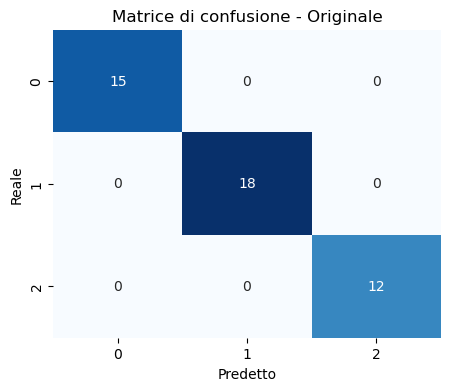

In [27]:
eval_originale = evaluate_model(
    grid_originale,
    split_results['Originale']['X_test'],
    split_results['Originale']['y_test'],
    dataset_name='Originale'
)

Dopo la fase di tuning iperparametrico tramite GridSearchCV, il modello ottimale (pipeline con PCA e Regressione Logistica) del dataset originale è stato valutato sull’insieme di test.

L’accuratezza ottenuta sul test set è risultata pari a 1.00, indicando che il modello ha classificato correttamente tutti i campioni.

Questo risultato è coerente con la forte separabilità già osservata nelle analisi esplorative e nella PCA, dove le tre classi di produttori mostravano aree facilmente distinguibili nello spazio delle componenti principali. Però può esssere sospetto, perchè apparentemente irreale. Potrebbe nascondere un leggero overfitting. La discrepanza che vi è tra l'accuratezza del miglior CV e il test set è comunque lieve, circa dell'1,5%, suggerisce una buona capacità di generalizzazione.


 Valutazione sul dataset: Senza_outlier
✅ Test accuracy (Senza_outlier): 1.0000

Classification Report:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0     15.0
1                   1.0     1.0       1.0     15.0
2                   1.0     1.0       1.0     11.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     41.0
weighted avg        1.0     1.0       1.0     41.0


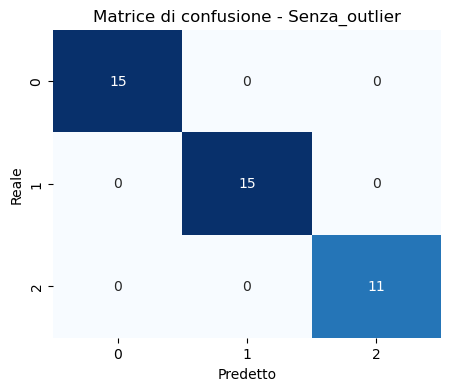

In [28]:
eval_no_out = evaluate_model(
    grid_no_out,
    split_results['Senza_outlier']['X_test'],
    split_results['Senza_outlier']['y_test'],
    dataset_name='Senza_outlier'
)


 Valutazione sul dataset: Capped
✅ Test accuracy (Capped): 1.0000

Classification Report:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0     15.0
1                   1.0     1.0       1.0     18.0
2                   1.0     1.0       1.0     12.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     45.0
weighted avg        1.0     1.0       1.0     45.0


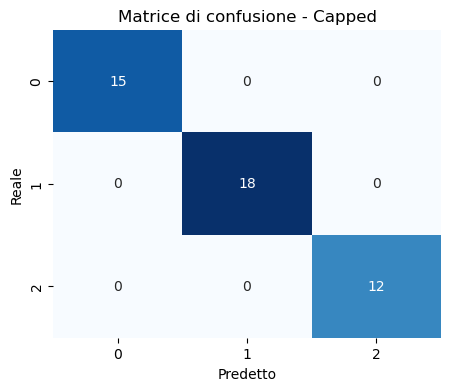

In [29]:
eval_capped = evaluate_model(
    grid_capped,
    split_results['Capped']['X_test'],
    split_results['Capped']['y_test'],
    dataset_name='Capped'
)

Accuratezza perfetta anche nei due dataframe modificati dalla gestione degli outliers. Si nota quindi subito che non vi è alcuna differenza con questo split tra training set e test set tra otliers gestiti e non.
Questa accuratezza può insospettire sulla bontà del processo ed apparire irreale. Potrebbe essere dovuta ad un leggero overfitting. Anche qui la discrepanza che vi è tra l'accuratezza del miglior CV e il test set è lieve, sempre intorno all'1,5%, e suggerisce una buona capacità di generalizzazione.

Per avere maggiori dati su cui riflettere, possiamo innazitutto eliminare "stratify" che mantiene le proporzioni delle classi target tra training set e test set, lasciando i dati più "liberi". Poi si possono testare diversi random_state che permettono di mischiare diversamente i campioni. 

Al termine di tutta la prova si faranno tutte le considerazioni; anche sulla scelta di prendere un modello che elimina gli outliers o meno.

7. PROVA CON DIVERSO RANDOM_STATE

In [30]:
split_results2 = split_datasets(datasets, random_state=2028, stratify=False)


🔹 Dataset: Originale
  ▪️ Train: X=(133, 13), y=(133,)
  ▪️ Test:  X=(45, 13), y=(45,)

🔹 Dataset: Senza_outlier
  ▪️ Train: X=(120, 13), y=(120,)
  ▪️ Test:  X=(41, 13), y=(41,)

🔹 Dataset: Capped
  ▪️ Train: X=(133, 13), y=(133,)
  ▪️ Test:  X=(45, 13), y=(45,)


In [32]:
grid_originale2 = train_logistic_pca(
    split_results2['Originale']['X_train'],
    split_results2['Originale']['y_train']
)

grid_no_out2 = train_logistic_pca(
    split_results2['Senza_outlier']['X_train'],
    split_results2['Senza_outlier']['y_train']
)

grid_capped2 = train_logistic_pca(
    split_results2['Capped']['X_train'],
    split_results2['Capped']['y_train']
)

Fitting 5 folds for each of 30 candidates, totalling 150 fits

✅ Best params: {'clf__C': 0.1, 'pca__n_components': 13}
✅ Best CV accuracy: 0.9926

Fitting 5 folds for each of 30 candidates, totalling 150 fits

✅ Best params: {'clf__C': 0.01, 'pca__n_components': 6}
✅ Best CV accuracy: 0.9917

Fitting 5 folds for each of 30 candidates, totalling 150 fits

✅ Best params: {'clf__C': 0.1, 'pca__n_components': 13}
✅ Best CV accuracy: 0.9852



Si può già notare come i parametri migliori evidenziati dalla cross-validation risultano essere diversi.


 Valutazione sul dataset: Originale
✅ Test accuracy (Originale): 0.9556

Classification Report:
              precision  recall  f1-score  support
0                 0.938   1.000     0.968   15.000
1                 1.000   0.895     0.944   19.000
2                 0.917   1.000     0.957   11.000
accuracy          0.956   0.956     0.956    0.956
macro avg         0.951   0.965     0.956   45.000
weighted avg      0.959   0.956     0.955   45.000


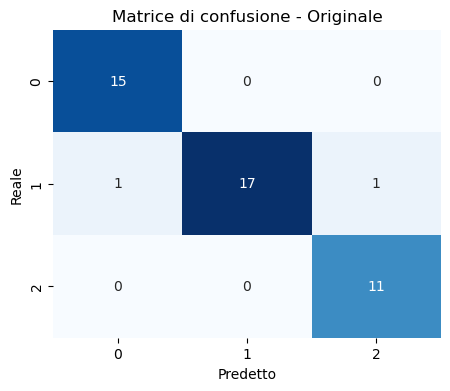

In [33]:
eval_originale2 = evaluate_model(
    grid_originale2,
    split_results2['Originale']['X_test'],
    split_results2['Originale']['y_test'],
    dataset_name='Originale')

In questo caso il dataset originale si dimostra non impeccabile, ma con un'accuratezza estremamente elevata. Vi è un -3.5% di accuratezza sul test set rispetto al best CV e questo può accendere un campanelo dall'allarme su un lieve overfitting.


 Valutazione sul dataset: Senza_outlier
✅ Test accuracy (Senza_outlier): 1.0000

Classification Report:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0     11.0
1                   1.0     1.0       1.0     19.0
2                   1.0     1.0       1.0     11.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     41.0
weighted avg        1.0     1.0       1.0     41.0


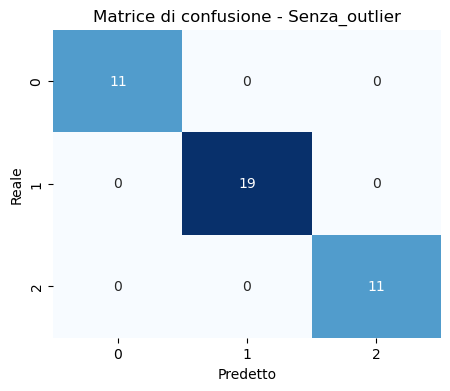

In [34]:
eval_no_out2 = evaluate_model(
    grid_no_out2,
    split_results2['Senza_outlier']['X_test'],
    split_results2['Senza_outlier']['y_test'],
    dataset_name='Senza_outlier')

Il dataset senza outliers continua ad essere completamente impeccabile. Best CV accuracy e test accuracy differiscono di meno dell' 1% e questo rientra nella norma.


 Valutazione sul dataset: Capped
✅ Test accuracy (Capped): 0.9556

Classification Report:
              precision  recall  f1-score  support
0                 1.000   0.933     0.966   15.000
1                 0.947   0.947     0.947   19.000
2                 0.917   1.000     0.957   11.000
accuracy          0.956   0.956     0.956    0.956
macro avg         0.955   0.960     0.956   45.000
weighted avg      0.957   0.956     0.956   45.000


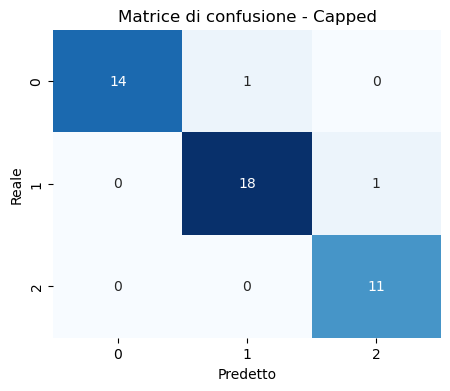

In [35]:
eval_capped2 = evaluate_model(
    grid_capped2,
    split_results2['Capped']['X_test'],
    split_results2['Capped']['y_test'],
    dataset_name='Capped')

Il dataset "capped", in cui gli outliers sono stati sostituiti, si accoda alla performace di quello originale, sia in termini di accuratezza assoluta che di differenza tra quella del miglior CV e quella del test.

Il dataset senza outliers sembra ancora sospettosamente "invincibile". Proprio per questo è interessante metterlo alla prova con un numero nutrito di random_state, sempre senza "stratify".

In [16]:
# Lista dei random_state da testare
random_states = [0, 1, 2, 10, 21, 33, 43, 63, 99, 123, 1111, 1682]

In [23]:
def test_random_states_with_params(df, random_states, test_size=0.25, stratify=False):
    """
    Testa la stabilità del modello PCA + LogisticRegression su diversi random_state
    e riporta i migliori iperparametri e le prestazioni corrispondenti.

    Parametri
    ----------
    df : pandas.DataFrame
        Dataset da utilizzare (deve contenere la colonna 'target').
    random_states : list
        Lista dei semi casuali da testare.
    test_size : float, default=0.25
        Percentuale del dataset da destinare al test set.
    stratify : bool, default=False
        Se True, stratifica la divisione mantenendo le proporzioni delle classi.

    Ritorna
    -------
    results_df : pandas.DataFrame
        Tabella con:
        - random_state
        - Best C
        - Best n_components
        - Best CV accuracy
        - Test accuracy
        - Differenza CV-Test
    """

    results = []

    for rs in random_states:

        # Split del dataset
        X1 = df.drop(columns='target')
        y1 = df['target']

        X1_train, X1_test, y1_train, y1_test = train_test_split(
            X1, y1, test_size=test_size,
            random_state=rs,
            stratify=y if stratify else None
        )

        # Addestramento modello
        grid_trained = train_logistic_pca(X1_train, y1_train, random_state=rs, verbose=False)

        # Valutazione sul test
        eval_res = evaluate_model(grid_trained, X1_test, y1_test,
                                  dataset_name=f"random_state_rs{rs}",
                                  class_report=False,
                                  plot_confusion=False,
                                  verbose=False)

        # Estrai parametri migliori e CV accuracy
        best_params = grid_trained.best_params_
        best_cv = grid_trained.best_score_
        test_acc = eval_res['accuracy']

        # Aggiungi ai risultati
        results.append({
            'random_state': rs,
            'Best C': best_params['clf__C'],
            'Best n_components': best_params['pca__n_components'],
            'Best CV accuracy': round(best_cv, 4),
            'Test accuracy': round(test_acc, 4),
            'Δ (Test - CV)': round(test_acc - best_cv, 4)
        })

    # Crea tabella finale
    results_df = pd.DataFrame(results)
    print("\n📊 Risultati finali su diversi random_state:")
    print(results_df)
    print("\nMedia test accuracy:", results_df['Test accuracy'].mean().round(4))

    return results_df

In [24]:
tabella_senza_out = test_random_states_with_params(df_no_outliers, random_states)

Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Valutazione sul dataset: random_state_rs0
Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Valutazione sul dataset: random_state_rs1
Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Valutazione sul dataset: random_state_rs2
Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Valutazione sul dataset: random_state_rs10
Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Valutazione sul dataset: random_state_rs21
Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Valutazione sul dataset: random_state_rs33
Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Valutazione sul dataset: random_state_rs43
Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Valutazione sul dataset: random_state_rs63
Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Valutazione sul dataset: random_state_rs99
Fitting 5 folds for each of 30 candidate

Questa tabella riassuntiva di tutte le prove sul dataset senza outliers mostra chiaramente che l'accuracy perfetta era un caso, poichè il modello, nella bontà del progetto, non è impeccabile. Ma a maggior ragione la varietà di accuratezza sul test, sempre estremamente elevata, testimonia la solidità e la stabilità del modello.

Su 12 tentativi, 5 raggiungono l'accuratezza perfetta. Questo mostra chiaramente come la perfezione sia dovuta al caso rispeto alla performance comunque molto elevata, ma come sia comunque qualcosa di possibile e frequente. La casualità della suddivisione train/test in certi random_state può produrre split particolarmente favorevoli. Le caratteristiche intrinseche del dataset Wine, infatti, set piccolo e con classi molto ben separate nei valori delle feature e ben separabili come visibile chiaramente nell'EDA, facilitano la perfezione. A maggior ragione quando gli outliers, ovvero i dati più disorientanti, vengono eliminati. 

Il delta di accuratezza tra miglior CV e il test set è sempre lieve, non supera mai il 5% ad esclusione della randomizzazione 0: questa eccezione è probabilmente dovuta proprio all'ordine delle righe nel dataset originale.

Adesso è interessante testare anche gli altri due dataset su questo nutrito gruppo di random_state per valutare se ci sono sono delle differenze considerevoli.

In [25]:
tabella_capped = test_random_states_with_params(df_capped, random_states)

Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Valutazione sul dataset: random_state_rs0
Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Valutazione sul dataset: random_state_rs1
Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Valutazione sul dataset: random_state_rs2
Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Valutazione sul dataset: random_state_rs10
Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Valutazione sul dataset: random_state_rs21
Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Valutazione sul dataset: random_state_rs33
Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Valutazione sul dataset: random_state_rs43
Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Valutazione sul dataset: random_state_rs63
Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Valutazione sul dataset: random_state_rs99
Fitting 5 folds for each of 30 candidate

In questo caso, nel dataset dove gli outliers sono stati sostituiti e non eliminati, dove è presente il numero di righe originale vi è una media test accuracy inferiore rispetto a prima solo dello 0,38%: prestazioni nel complesso assimilabili a quelle del dataset senza outliers. La perfezione sul test set infatti viene raggiunta solo 1 volta in meno, e tra le 4 totali 2 sono condivise con il dataset precedente (random_state 99 e 1682, evidentemente split particolarmente favorevoli) mentre 2 differiscono, mostrando delle differenze di pattern.

Il delta di accuratezza tra miglior CV e il test set è anche quì nel complesso lieve, solo in due casi si aggira intorno al 5% mentre in quattro casi rasenta lo 0. C'è da specificare e da tenere in considerazione che in un test set così piccolo (45 elementi) un singolo errore ha un peso importante in termini percentuali, ma una manciata di errori sono la norma per qualsiasi modello.

In [26]:
tabella_con_out = test_random_states_with_params(df, random_states)

Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Valutazione sul dataset: random_state_rs0
Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Valutazione sul dataset: random_state_rs1
Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Valutazione sul dataset: random_state_rs2
Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Valutazione sul dataset: random_state_rs10
Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Valutazione sul dataset: random_state_rs21
Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Valutazione sul dataset: random_state_rs33
Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Valutazione sul dataset: random_state_rs43
Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Valutazione sul dataset: random_state_rs63
Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Valutazione sul dataset: random_state_rs99
Fitting 5 folds for each of 30 candidate

Nel dataset orignale con gli outliers la media test accuracy rimane altissima ma è 0,93% più bassa rispetto al datset senza outliers, segno che la gestione di questi faccia guadagnare in termini di accuratezza, anche se in questo caso specifico guadagnare lievemente. La perfezione nel test set viene raggiunta ancora 4 volte (sempre random_state 99 e 1692 che confermano dei pattern particolarmente favorevoli per il dataset), di cui 1 in comune solo con il "capped" e 1 esclusiva a testimoniare ancora la varietà di pattern. 

Il delta di accuracy tra best CV e test set in questi casi vede dei picchi lievemente più alti, ma anche lo 0 assoluto. C'è una variazione leggermente più alta rispetto agli altri dove i valori anomali sono stati gestiti. Un leggerissimo overfitting in questo dataset può essere più plausibile; ma non cambia il discorso riguardante il peso specifico di un singolo errore in un dataset così piccolo.

8. DECISIONE e CONSIDERAZIONI

Dopo tutte le valutazioni svolte, è utile fare un passo indietro: in condizioni standard e strutturate con random_state=42 e stratificazione attiva tutti e tre gli approcci (originale, capped, no outliers) mostravano un’accuratezza impeccabile.
Le prove successive con diversi random_state hanno mostrato che questi risultati non sono “sospetti”, ma riflettono la robustezza del modello e la semplicità strutturale del dataset Wine.

Tra i diversi approcci di gestione degli outlier, quello più corretto e giustificabile per un modello finale è il dataset "capped", che riduce l’influenza dei valori estremi senza eliminarli,sostituendoli con i corrispondenti quantili inferiori/superiori.
Rimuovere completamente gli outlier, infatti, porta a una leggera (seppur costante) superiorità in accuratezza nelle prove, ma al costo di modificare la distribuzione originale ed eliminare righe del dataset.
L’approccio capped, invece:

- mantiene intatta la dimensione del dataset,

- riduce la sensibilità del modello a campioni estremi,

- produce una performance quasi equivalente a quella del dataset senza outlier,

- è metodologicamente più corretto su dataset più grandi e complessi.

Alla luce di ciò, il capped risulta un compromesso ottimale tra performance, stabilità e rigore statistico.

Una volta individuato il modello migliore, è utile approfondire il ruolo svolto dalla PCA nel processo di modellazione.
Nel dataset originale, in condizioni standard, la validazione aveva selezionato tutte e 13 le componenti principali come soluzione ottimale. Questo può sembrare, a prima vista, in contraddizione con l’obiettivo della PCA, che è quello di ridurre la dimensionalità.
In realtà la scelta è coerente con un altro beneficio della PCA: decorrelare le variabili. Nonostante l’elevata multicollinearità evidenziata nell’EDA, la PCA può contribuire alla stabilità della regressione logistica anche senza ridurre il numero di dimensioni, grazie alla trasformazione ortogonale dello spazio delle feature.

Quando n_components = 13, infatti, la PCA non elimina informazioni ma effettua una rotazione delle variabili originali, producendo un set di componenti non correlate. Questo può comunque migliorare la robustezza del modello e facilitare il processo di ottimizzazione nell’ambito della GridSearch.

Concentrandosi invece sul modello selezionato come finale — ottenuto dal dataset capped — la validazione individua 8 componenti principali come numero ottimale.
È quindi interessante identificare quali componenti (e quali feature originali contribuiscono maggiormente ad esse) risultino più rilevanti per il modello. Questo passaggio consente di completare l’analisi, chiarendo:

- quali variabili sono più informative,
- come la PCA ha sintetizzato la struttura del dataset,
- e in che modo la riduzione dimensionale abbia contribuito alla generalizzazione del modello.

In [22]:
grid_capped = train_logistic_pca(
    split_results['Capped']['X_train'],
    split_results['Capped']['y_train'])

Fitting 5 folds for each of 30 candidates, totalling 150 fits

✅ Best params: {'clf__C': 0.01, 'pca__n_components': 8}
✅ Best CV accuracy: 0.9846



In [30]:
# Pipeline ottimizzata uscita dal GridSearch
best_pipe = grid_capped.best_estimator_

# Estraggo la PCA dalla pipeline
pca = best_pipe.named_steps['pca']

# Nomi delle feature originali
feature_names = split_results['Capped']['X_train'].columns

# Componenti PCA
pca_components = pd.DataFrame(
    pca.components_,
    columns=feature_names,
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)

print(pca_components)

# Importanza delle variabili
importance = pca_components.abs().mean(axis=0).sort_values(ascending=False)

      alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
PC1  0.160220   -0.235620 -0.010307          -0.254713   0.135147   
PC2  0.471150    0.207986  0.331836          -0.038388   0.357442   
PC3 -0.092761    0.070203  0.637879           0.614062   0.057804   
PC4 -0.099214    0.595803 -0.210755           0.114442  -0.022520   
PC5 -0.260809   -0.088175  0.050467           0.073580   0.742691   
PC6 -0.247692   -0.379698 -0.196051           0.051493   0.220980   
PC7 -0.121552    0.531747 -0.073742          -0.343405   0.329663   
PC8  0.503039    0.111083 -0.195605           0.314923  -0.084314   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
PC1       0.387870    0.421432             -0.279465         0.315602   
PC2       0.050889   -0.014423              0.004070        -0.017382   
PC3       0.196286    0.129234              0.198750         0.177103   
PC4       0.148075    0.142103             -0.427030         0.287055   
PC5      -0.2

In [31]:
print("Feature più rilevanti per le componenti principali:\n")
print(importance.head())

Feature più rilevanti per le componenti principali:

nonflavanoid_phenols    0.284565
malic_acid              0.277539
proanthocyanins         0.276156
alcohol                 0.244555
magnesium               0.243820
dtype: float64


Le 8 componenti scelte dal modello catturano principalmente:

1. Fenoli e struttura aromatica (PC1)
2. Colore e alcol (PC2)
3. Componenti chimiche ash/alcalinità (PC3)
4. Acidità e tonalità (PC4)
5. Magnesio e fenoli non flavonoidi (PC5)
6. Componenti più tecniche (PC6–PC8)

Quindi la PCA sta:

- decorrelando fortemente le variabili originali
- raccogliendo proprietà del vino in un insieme più compatto e più informativo
- mantenendo solo le 8 direzioni di massima varianza utili al modello

Adesso è interessante valutare il reale impatto della PCA confrontando tre approcci diversi:

- il modello scelto in precedenza con PCA ottimizzata tramite GridSearch;

- un modello senza PCA;

- un modello con PCA impostata non tramite una griglia fissa di componenti, ma tramite una soglia di varianza spiegata pari al 95%.

Questo confronto permette di capire se la PCA stia davvero contribuendo al modello, e in che modo, quando viene utilizzata come riduzione dimensionale (PCA 95%) rispetto alla versione che mantiene tutte le componenti (PCA “gridata”).

In [43]:
#  MODELLO 1 — PCA con 95% varianza

pca_95 = PCA(n_components=0.95)

pipe_pca = Pipeline([
    ("pca", pca_95),
    ("clf", LogisticRegression(max_iter=5000))
])

# Parametri solo per la regressione logistica
param_grid_pca = {
    "clf__C": [0.01, 0.1, 1, 10, 100]
}

grid_pca = GridSearchCV(
    estimator=pipe_pca, param_grid=param_grid_pca,
    cv=5, scoring="accuracy"
)

grid_pca.fit(split_results['Capped']['X_train'],
    split_results['Capped']['y_train'])

y_pred_pca = grid_pca.predict(split_results['Capped']['X_test'])
acc_pca = accuracy_score(split_results['Capped']['y_test'], y_pred_pca)

#  MODELLO 2 — Logistic Regression senza PCA

pipe_nopca = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=5000))
])

# Parametri per la Regressione logistica
param_grid_nopca = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_nopca = GridSearchCV(
    estimator=pipe_nopca,
    param_grid=param_grid_nopca,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_nopca.fit(split_results['Capped']['X_train'],
    split_results['Capped']['y_train'])

y_pred_nopca = grid_nopca.predict(split_results['Capped']['X_test'])
acc_nopca = accuracy_score(split_results['Capped']['y_test'], y_pred_nopca)

# ===========================
#  RISULTATI FINALI
# ===========================
results = pd.DataFrame({
    "Modello": ["LogReg + PCA(95%)", "LogReg senza PCA"],
    "Test Accuracy": [acc_pca, acc_nopca],
    "N° Componenti PCA": [grid_pca.best_estimator_.named_steps["pca"].n_components_, "—"],
    "Best C": [grid_pca.best_params_["clf__C"], grid_nopca.best_params_["clf__C"]]
})

print("\n===== Confronto finale PCA(95%) vs No-PCA =====\n")
print(results)

print("\nMatrice di confusione — PCA:")
print(confusion_matrix(split_results['Capped']['y_test'], y_pred_pca))

print("\nMatrice di confusione — No PCA:")
print(confusion_matrix(split_results['Capped']['y_test'], y_pred_nopca))


===== Confronto finale PCA(95%) vs No-PCA =====

             Modello  Test Accuracy N° Componenti PCA  Best C
0  LogReg + PCA(95%)       0.711111                 1    0.01
1   LogReg senza PCA       1.000000                 —    0.01

Matrice di confusione — PCA:
[[13  0  2]
 [ 0 16  2]
 [ 1  8  3]]

Matrice di confusione — No PCA:
[[15  0  0]
 [ 0 18  0]
 [ 0  0 12]]


L’impostazione PCA con varianza spiegata al 95% ha selezionato solo 1 componente principale.
La PCA riduce la dimensionalità mantenendo la direzione di massima varianza globale, ma non necessariamente la direzione che massimizza la separazione tra le classi.
Nel dataset Wine, la prima componente spiega molta varianza “totale”, ma non è sufficiente per discriminare efficacemente le classi.
Di conseguenza, la riduzione drastica da 13 feature a 1 componente ha comportato una grande perdita di informazione discriminativa, con un crollo dell’accuratezza dal 100% al 71%.

Quando la PCA viene trattata come iperparametro all’interno di un processo di validazione, il modello sceglie il numero di componenti più adatto al compito di classificazione.
La GridSearch non ottimizza la varianza globale, ma la performance del modello sulle diverse scelte di n_components.
Nel dataset capped, la validazione ha selezionato 8 componenti, un numero che preserva la quasi totalità dell’informazione discriminativa, ma beneficia al tempo stesso della decorrelazione introdotta dalla PCA.

La Logistic Regression senza PCA è comunque molto efficace con questo dataset, perché le classi del Wine sono ben separate anche nello spazio originale.
Lo scaling sommato all'ottimizzazione di C permette al modello di convergere bene e ottenere performance molto alte.

Questo insieme di test mostra che la PCA è utile soprattutto come strumento di decorrelazione e stabilizzazione del modello, mentre la riduzione dimensionale deve essere fatta con cautela e validata, perché può peggiorare drasticamente le prestazioni se troppo aggressiva.